In [1]:
import webbrowser
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Information sur les variables disponibles ici:
## uncomment to open it 
#url = "https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy"
#webbrowser.open(url, new=2)


In [3]:
# Option d'affichage
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
spacer =  '"\n", "\n"'
# chemin d accès au fichier
path_2015 = "C:\Jason\Formation OCR\Projet 3\energie_2015.csv"
path_2016 = "C:\Jason\Formation OCR\Projet 3\energie_2016.csv"

# lecture des fichiers csv
dataset_2015 = pd.read_csv(path_2015)
dataset_2016 = pd.read_csv(path_2016)

#display(msno.matrix(dataset_2015))
#display(msno.matrix(dataset_2016))

In [4]:
#display(dataset_2015.shape)
#display(dataset_2016.shape)

# On regarde quelles colonnes diffèrent:
diff_col_2015 = [col for col in dataset_2015.columns.tolist() if col not in dataset_2016.columns.tolist()]
diff_col_2016 = [col for col in dataset_2016.columns.tolist() if col not in dataset_2015.columns.tolist()]
print("diff_col_2015:", "\n", diff_col_2015, "\n")
print("diff_col_2016:", "\n", diff_col_2015, "\n")


# Changement Location pour latitude/longitude
import ast

location = [ast.literal_eval(rows["Location"]) for idx, rows in dataset_2015.iterrows()]
dataset_2015["Latitude"] = [i["latitude"] for i in location]
dataset_2015["Longitude"] = [i["longitude"] for i in location]

dataset_2015["Address"] = [ast.literal_eval(i["human_address"])["address"] for i in location]
dataset_2015["City"] = [ast.literal_eval(i["human_address"])["city"] for i in location]
dataset_2015["State"] = [ast.literal_eval(i["human_address"])["state"] for i in location]
dataset_2015["ZipCode"] = [ast.literal_eval(i["human_address"])["zip"] for i in location]
dataset_2015 = dataset_2015.drop("Location", axis=1)


# Changement noms variables pour qu'elles soient égales.
dict_2015 = {"GHGEmissions(MetricTonsCO2e)" : "TotalGHGEmissions",
             "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity",
            "Comment" : "Comments"}

dataset_2015 = dataset_2015.rename(dict_2015, axis=1)
diff_col_2015 = [col for col in dataset_2015.columns.tolist() if col not in dataset_2016.columns.tolist()]


dataset_2015 = dataset_2015.drop(diff_col_2015, axis=1)

diff_col_2015: 
 ['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes'] 

diff_col_2016: 
 ['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes'] 



In [5]:
col_2015 = dataset_2015.columns.tolist()
col_2016 = dataset_2016.columns.tolist()

diff_col_2015 = [col for col in col_2015 if col not in col_2016]
diff_col_2016 = [col for col in col_2016 if col not in col_2015]
print("diff_col_2015:", "\n", diff_col_2015, "\n")
print("diff_col_2016:", "\n", diff_col_2015, "\n")
print("Aucune différence entre les variables des deux tableaux, on peut maintenant les assembler.")

diff_col_2015: 
 [] 

diff_col_2016: 
 [] 

Aucune différence entre les variables des deux tableaux, on peut maintenant les assembler.


In [6]:
df = pd.concat([dataset_2015, dataset_2016], ignore_index=True)
print("dataset_2015.shape:", dataset_2015.shape)
print("dataset_2016.shape:", dataset_2016.shape)
print("df.shape:", df.shape)
df = df.reindex()

dataset_2015.shape: (3340, 46)
dataset_2016.shape: (3376, 46)
df.shape: (6716, 46)


In [7]:
# Supprime les doublons et on garde les plus récents (2016)
df = df.drop_duplicates(subset="OSEBuildingID", keep="last")
display(df["DataYear"].value_counts())
print("Nous avons gardé la totalité du dataset de 2016 plus les batiments de 2015 non présent dans le dataset de 2016.")

2016    3376
2015      56
Name: DataYear, dtype: int64

Nous avons gardé la totalité du dataset de 2016 plus les batiments de 2015 non présent dans le dataset de 2016.


In [8]:
dataset_2015["ComplianceStatus"].value_counts()


Compliant        3337
Not Compliant       3
Name: ComplianceStatus, dtype: int64

# Nettoyage des données
    1) Suppression des colonnes 
    2) Suppresssion des lignes

In [9]:
df.describe(percentiles=[])

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3432.000000,3432.000000,3432.000000,3432.000000,3424.000000,3432.000000,3.432000e+03,3432.000000,3.432000e+03,3.396000e+03,1698.000000,602.000000,2574.000000,3424.000000,3425.000000,3422.000000,3422.000000,3.426000e+03,3.425000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3422.000000,3422.000000
mean,21184.746795,2015.983683,4.448135,1968.360140,1.106893,4.688228,9.458342e+04,8166.758450,8.641666e+04,7.924432e+04,28482.410658,11694.299666,68.004662,54.753359,57.066482,134.179866,137.725745,5.419074e+06,5.299214e+06,2.776179e+05,1.087393e+06,3.710186e+06,1.379135e+04,1.379135e+06,120.539719,1.173822
std,12211.835092,0.126710,2.119483,33.182901,2.093552,5.458473,2.176413e+05,33029.178094,2.064498e+05,2.011151e+05,54431.218483,29195.448352,26.795406,56.839741,57.827533,139.547346,139.453815,2.161694e+07,1.608129e+07,3.897938e+06,4.337231e+06,1.479864e+07,6.794873e+04,6.794873e+06,541.496716,1.821569
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
50%,23109.500000,2016.000000,4.000000,1974.000000,1.000000,4.000000,4.409900e+04,0.000000,4.313700e+04,3.987450e+04,10664.000000,5043.000000,75.000000,38.500000,40.700001,96.099998,100.850002,1.794019e+06,1.892150e+06,0.000000e+00,3.446348e+05,1.175894e+06,3.139682e+03,3.139680e+05,33.790000,0.610000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


In [10]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3432 entries, 47 to 6715
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3432 non-null   int64  
 1   DataYear                         3432 non-null   int64  
 2   BuildingType                     3432 non-null   object 
 3   PrimaryPropertyType              3432 non-null   object 
 4   PropertyName                     3432 non-null   object 
 5   TaxParcelIdentificationNumber    3431 non-null   object 
 6   CouncilDistrictCode              3432 non-null   int64  
 7   Neighborhood                     3432 non-null   object 
 8   YearBuilt                        3432 non-null   int64  
 9   NumberofBuildings                3424 non-null   float64
 10  NumberofFloors                   3432 non-null   float64
 11  PropertyGFATotal                 3432 non-null   int64  
 12  PropertyGFAParking 

None

In [11]:
df["Outlier"] = df["Outlier"].fillna(0)

In [12]:
# Suppression des outliers
print("shape dataset before removing Outliers :", df.shape)
df = df[df["Outlier"] == 0]
# Suppression de la colonne Outlier car plus d'information utile
df = df.drop("Outlier", axis=1)
print("shape dataset after removing Outliers :", df.shape)

shape dataset before removing Outliers : (3432, 46)
shape dataset after removing Outliers : (3397, 45)


In [13]:
# on liste tous les usages de propriété dans la variable "ListOfAllPropertyUseTypes"
import numpy as np
#display(df["ListOfAllPropertyUseTypes"].head())
#display(df["ListOfAllPropertyUseTypes"].tolist()) #str.split(', '))
property_use = set()
for string in df["ListOfAllPropertyUseTypes"].tolist():
    if isinstance(string, float):
        continue
    property_use = set().union(property_use, string.split(', '))
property_use = list(property_use)
print("Il y a ", len(property_use), "usage différent pour les bâtiments.")
print(f"Faire une opération d'encodage sur {len(property_use)} ne semble pas être une bonne idée")
print("On pourrait remplacer par le nombre d'utilisation différente en revanche.")


Il y a  72 usage différent pour les bâtiments.
Faire une opération d'encodage sur 72 ne semble pas être une bonne idée
On pourrait remplacer par le nombre d'utilisation différente en revanche.


In [14]:
# on remplace le type d'utilisation par le nombre d'utilisation
#df["NumberOfUses"] = [len(word) if isinstance(word, float) else 0 for word in df['ListOfAllPropertyUseTypes'].str.split(',') ]
df["NumberOfUses"] = [str(word).count(",") + 1 for word in df['ListOfAllPropertyUseTypes'].str.split(',')]
df.drop("ListOfAllPropertyUseTypes", axis=1, inplace=True)
df.head()



,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode,NumberOfUses
47,61,2015,Multifamily LR (1-4),Low-Rise Multifamily,GATEWOOD APTS,1975700600,7,DOWNTOWN,1900,1.0,4.0,48383,0,48383,Multifamily Housing,38172.0,Retail Store,10211.0,NaN,NaN,NaN,75.0,61.0,69.9,129.6,139.4,2953338.0,3379678.0,915977.0,424619.0,1448859.0,5886.0,588563.0,112.06,2.19,No,NaN,Compliant,47.60973588,-122.3403842,107 PINE ST,SEATTLE,WA,98101,2
165,266,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEST SEATTLE COMM. RESOURCE CENTER/FOOD BANK A...,9271000000,1,DELRIDGE,2007,1.0,4.0,52134,0,52134,Multifamily Housing,52134.0,NaN,NaN,NaN,NaN,NaN,85.0,23.3,26.3,73.0,82.5,1212551.0,1369895.0,0.0,355378.0,1212601.0,0.0,0.0,8.45,0.06,Yes,NaN,Compliant,47.54423839,-122.376171,6500 35TH AVE SW,SEATTLE,WA,98126,1
204,325,2015,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,659000005,7,DOWNTOWN,1989,1.0,4.0,111077,0,111077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,60.6,62.1,190.2,195.1,9898724.0,10155788.0,0.0,2901150.0,9899135.0,0.0,0.0,69.01,0.24,No,NaN,Compliant,47.61171108,-122.33681575,400 PINE ST,SEATTLE,WA,98101,1
272,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1974700175,7,DOWNTOWN,1906,1.0,6.0,98370,25920,72450,Office,98370.0,NaN,NaN,NaN,NaN,NaN,45.0,66.3,66.5,207.5,207.7,6525887.0,6541579.0,0.0,1901522.0,6488262.0,379.0,37893.0,47.24,0.20,No,NaN,Compliant,47.60679898,-122.3371001,1201 2ND AVE,SEATTLE,WA,98101,1
312,442,2015,NonResidential,Large Office,KING BROADCASTING,1991200870,7,LAKE UNION,1947,1.0,4.0,193788,37854,155934,Office,138672.0,Parking,47539.0,Other,11166.0,NaN,59.0,105.8,104.0,332.3,326.4,16760217.0,16463978.0,0.0,4912139.0,16760914.0,0.0,0.0,116.84,0.23,No,NaN,Compliant,47.6214758,-122.3430502,333 DEXTER AVE N,SEATTLE,WA,98109,5


In [15]:

#Suppression des colonnes inutiles
## Bâtiments non destinés à l'habitation  (énoncé du projet)
### The Gross Floor Area (GFA) 
print(df.columns.tolist(), "\n", "\n")
print("Comments in the dataset :", "\n", df["Comments"].value_counts(), "\n", "\n")
print("Comments in the dataset :", "\n", df["Comments"].value_counts(), "\n", "\n")
display(df["DefaultData"][df["DataYear"]==2016])
df = df[df["DefaultData"] != True]
df = df[df["DefaultData"] != "Yes"]

print("DefaultData in the dataset :", "\n", df["DefaultData"].value_counts(), "\n", "\n")
df = df.drop("DefaultData", axis=1)

# Suppression des colonnes inutiles, des colonnes WN (Weather normalization pas utile dans notre cas)
    # Pour la localisation nous garderons uniquement les longitudes/latitudes
    # Pour les type d'utilisation nous garderons NumberOfUses 
remover = ['PropertyName', 'Address', 'City', 'State', 'ZipCode','TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
          'SecondLargestPropertyUseType','ThirdLargestPropertyUseType', 'YearsENERGYSTARCertified', 'Comments']
remover_WN = [col for col in df.columns.tolist() if "WN" in col]
print(remover_WN)
df = df.drop(remover, axis=1)
df = df.drop(remover_WN, axis=1)

df.shape

['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments', 'ComplianceStatus', 'Latitude', 'Longitude', 'Address', 'City', 'State', 'ZipCode', 'NumberOfUses'] 
 

Comments in the dataset : 
 Under construction starting 09/2014 (old buildi

3340    False
3341    False
3342    False
3343    False
3344    False
        ...  
6711     True
6712    False
6713    False
6714    False
6715    False
Name: DefaultData, Length: 3344, dtype: object

DefaultData in the dataset : 
 False    3233
No         40
Name: DefaultData, dtype: int64 
 

['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']


(3273, 29)

In [16]:
# on garde uniquement les bâtiments non résidentiels:
# Suppression des individus qui contiennent "Mul" dans la variable "BuildingType" qui fait référence à Multifamily soit le résidentiel
df = df[~df["BuildingType"].str.contains("Mul")]
# Suppression des individus qui contiennent "Mul" dans la variable "PrimaryPropertyType" qui fait référence à Multifamily soit le résidentiel
df = df[~df["PrimaryPropertyType"].str.contains("Mul")]
print("BuildingType in the dataset :","\n", df["BuildingType"].value_counts(), "\n", "\n")
print("PrimaryPropertyType in the dataset :", "\n", df["PrimaryPropertyType"].value_counts(), "\n", "\n")
print(f"État des données : {df.shape[0]} Lignes, {df.shape[1]} Colonnes")

BuildingType in the dataset : 
 NonResidential        1457
Nonresidential COS      81
Campus                  24
SPS-District K-12       23
Nonresidential WA        1
Name: BuildingType, dtype: int64 
 

PrimaryPropertyType in the dataset : 
 Small- and Mid-Sized Office    290
Other                          254
Warehouse                      185
Large Office                   172
Mixed Use Property             115
Retail Store                    87
Hotel                           75
Worship Facility                70
K-12 School                     64
Distribution Center             53
Medical Office                  41
Supermarket / Grocery Store     40
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Restaurant                      12
Refrigerated Warehouse          12
Laboratory                      10
Hospital                        10
Non-Refrigerated Warehouse       2
Restaurant\n          

df shape après suppression colonnes: (1586, 29)
ComplianceStatus in the dataset : 
 Compliant        1569
Missing Data       14
Non-Compliant       3
Name: ComplianceStatus, dtype: int64 
 

État des données : 1569 Lignes, 28 Colonnes


<AxesSubplot:>

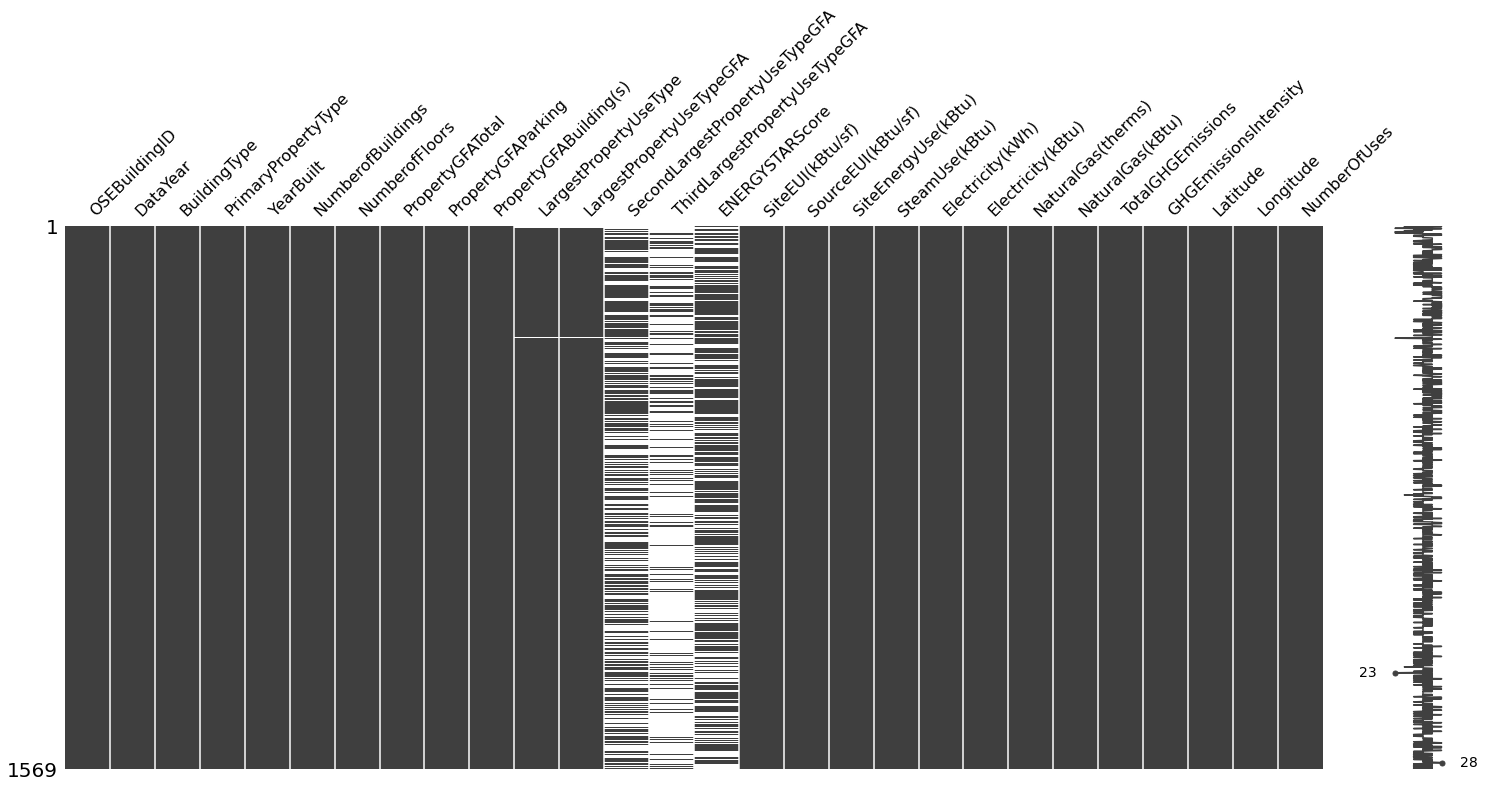

In [17]:
# Comprendre l'information données par la variable "ComplianceStatus"
print("df shape après suppression colonnes:", df.shape)
print("ComplianceStatus in the dataset :", "\n", df["ComplianceStatus"].value_counts(), "\n", "\n")
#display(df[df["ComplianceStatus"] == 'Missing Data'].info())
#display(msno.matrix(df[df["ComplianceStatus"] == 'Missing Data']))
# Nous garderons seulement les données conformes ("Compliant")
df = df[df["ComplianceStatus"] == "Compliant"]
#inutile de garder la colonne Complicance Status
df = df.drop("ComplianceStatus", axis=1)
print(f"État des données : {df.shape[0]} Lignes, {df.shape[1]} Colonnes")
msno.matrix(df)

In [18]:
# Suppression des colonnes redondantes NaturalGas, Electricity on conservera Kbtu pour uniformité des unités (conversion 1kWh = 3.412 kbtu)
# vérification entre kBtu et kWh
df["Electricity_kwh_div_Btu"] = [round(rows["Electricity(kWh)"] / rows["Electricity(kBtu)"], 3) if rows["Electricity(kWh)"] != 0 else 0.293 for idx, rows in df.iterrows()]
# On supprime les erreurs de conversions
display(df[df["Electricity_kwh_div_Btu"] != 0.293])
df = df[df["Electricity_kwh_div_Btu"] == 0.293]

df = df.drop(["Electricity(kWh)", "NaturalGas(therms)", "Electricity_kwh_div_Btu"], axis=1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,NumberOfUses,Electricity_kwh_div_Btu
5010,23064,2016,NonResidential,Other,1970,5.0,1.0,23166,0,23166,Other,23166.0,NaN,NaN,NaN,150.0,157.5,3475804.25,0.0,1.0,3.0,34758.00781,3475801.0,184.6,7.97,47.70969,-122.34557,1,0.333


<AxesSubplot:>

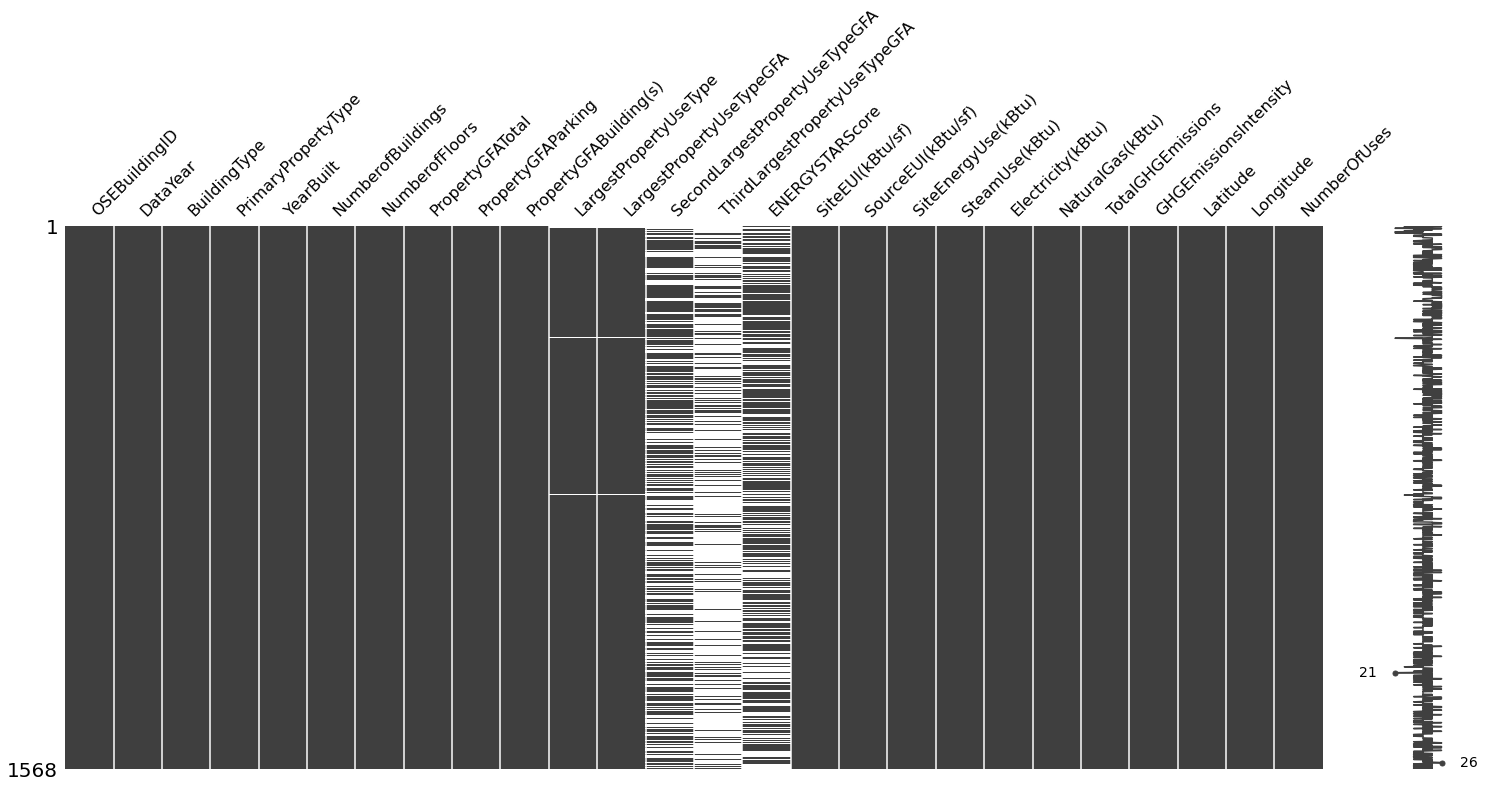

In [19]:
msno.matrix(df)

In [20]:
# Suppression des valeurs abberantes
# 1 ) affichage du tableau descriptifs
display(df.describe())


,OSEBuildingID,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,NumberOfUses
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1.568000e+03,1568.000000,1.568000e+03,1.558000e+03,850.000000,350.000000,1009.000000,1568.000000,1568.000000,1.568000e+03,1.568000e+03,1.568000e+03,1.568000e+03,1568.000000,1568.000000,1568.000000
mean,16474.173469,2015.985332,1961.420281,1.177934,4.264031,1.213785e+05,14113.047194,1.072654e+05,1.003504e+05,36576.101526,14943.543996,63.725471,75.281888,183.450000,8.933096e+06,5.597956e+05,6.170430e+06,2.074791e+06,196.418144,1.667946,1.948342
std,13831.172020,0.120260,32.977725,3.021868,6.747743,3.050488e+05,44817.542061,2.909647e+05,2.849652e+05,66803.764762,36940.372089,28.796924,76.158668,188.626266,3.136068e+07,5.707072e+06,2.146583e+07,9.853514e+06,784.233138,2.405247,1.240874
min,1.000000,2015.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,1.400000,0.000000,5.713320e+04,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000,1.000000
25%,602.750000,2016.000000,1929.000000,1.000000,1.000000,2.881700e+04,0.000000,2.792675e+04,2.503975e+04,5564.250000,2594.000000,44.000000,34.700001,81.099998,1.244928e+06,0.000000e+00,7.288942e+05,0.000000e+00,20.595000,0.360000,1.000000
50%,21180.500000,2016.000000,1965.000000,1.000000,2.000000,4.815900e+04,0.000000,4.608400e+04,4.204300e+04,12280.500000,5965.500000,71.000000,53.750000,138.650002,2.732167e+06,0.000000e+00,1.748792e+06,4.881350e+05,49.940000,0.880000,2.000000
75%,24625.250000,2016.000000,1988.250000,1.000000,4.000000,1.079565e+05,0.000000,9.605975e+04,9.261725e+04,31973.250000,12805.750000,88.000000,85.400002,213.549995,7.294487e+06,0.000000e+00,5.267052e+06,1.531404e+06,147.227500,1.965000,2.000000
max,50226.000000,2016.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,639931.000000,459748.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000,13.000000


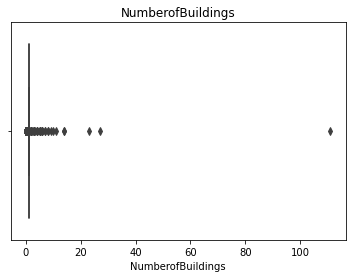

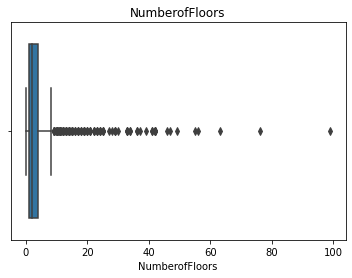

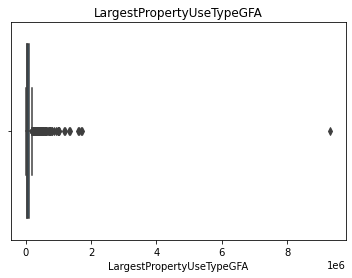

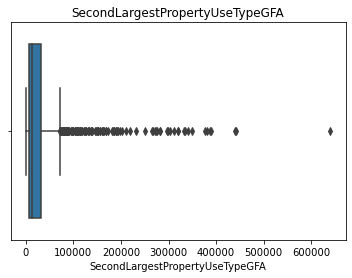

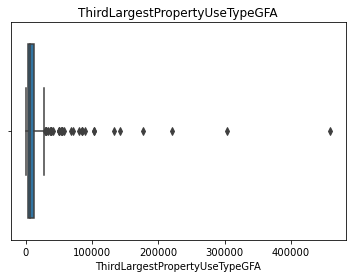

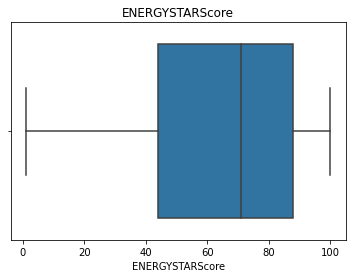

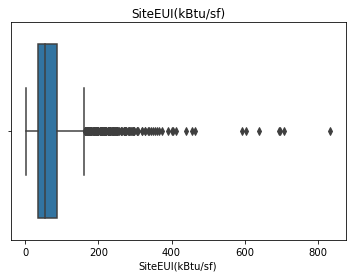

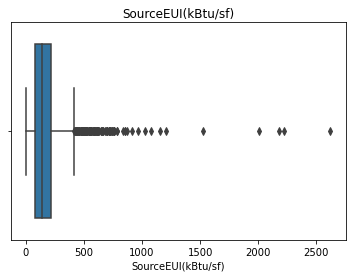

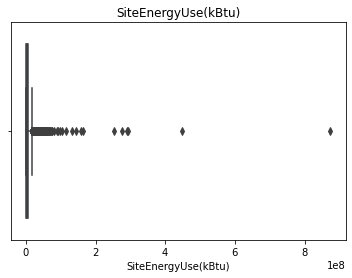

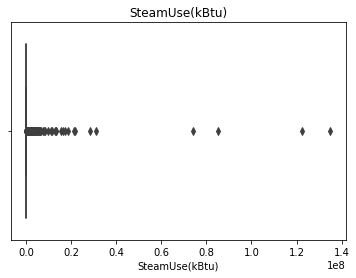

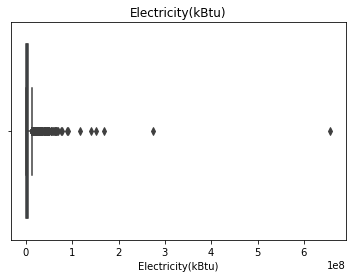

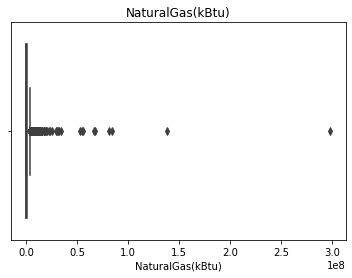

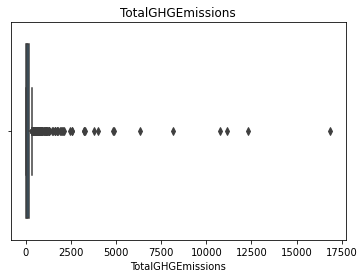

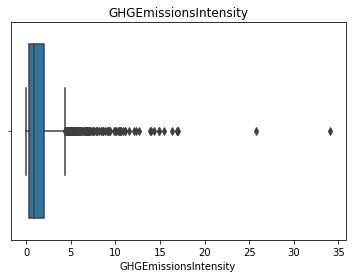

In [21]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.boxplot(x=var, data=df)
        plt.title(var)
        plt.show()

In [22]:
# À supprimer

# suppresion des valeurs aberrantes, peut-être qu'il produise plus d'énergie qu'il n'en consomme et la revende...
display(df[df["TotalGHGEmissions"] <=0])
display(df[df["GHGEmissionsIntensity"] <=0])
display(df[df["Electricity(kBtu)"] <0]) # inferieur ou égal à 0 car un batiment peut utiliser d autre source d energie
print("La valeur Electricity(kBtu) est négative donc il se peut que ce soit un bâtiment qui produit plus d'énergie qu'il n'en consomme. ","\n",
     "Nous n'en tiendrons pas compte dans notre analyse car nous souhaitons connaître la consommation en énergie.")
df = df[df["Electricity(kBtu)"] >= 0]
df = df[df["TotalGHGEmissions"] > 0]
display(df[df["TotalGHGEmissions"] == 0])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,NumberOfUses
3853,700,2016,NonResidential,Supermarket / Grocery Store,2008,1.0,1.0,57176,0,57176,Supermarket/Grocery Store,39500.0,15000.0,5500.0,31.0,208.800003,0.0,1.252517e+07,0.0,0.0,0.0,0.0,0.00,47.63718,-122.37734,5
6546,49784,2016,NonResidential,Small- and Mid-Sized Office,2013,1.0,6.0,52000,0,52000,Office,48159.0,NaN,NaN,100.0,7.100000,2.0,3.427261e+05,0.0,-115417.0,0.0,-0.8,-0.02,47.61432,-122.31257,1


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,NumberOfUses
3853,700,2016,NonResidential,Supermarket / Grocery Store,2008,1.0,1.0,57176,0,57176,Supermarket/Grocery Store,39500.0,15000.0,5500.0,31.0,208.800003,0.0,1.252517e+07,0.0,0.0,0.0,0.0,0.00,47.63718,-122.37734,5
6546,49784,2016,NonResidential,Small- and Mid-Sized Office,2013,1.0,6.0,52000,0,52000,Office,48159.0,NaN,NaN,100.0,7.100000,2.0,3.427261e+05,0.0,-115417.0,0.0,-0.8,-0.02,47.61432,-122.31257,1


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,NumberOfUses
6546,49784,2016,NonResidential,Small- and Mid-Sized Office,2013,1.0,6.0,52000,0,52000,Office,48159.0,NaN,NaN,100.0,7.1,2.0,342726.0938,0.0,-115417.0,0.0,-0.8,-0.02,47.61432,-122.31257,1


La valeur Electricity(kBtu) est négative donc il se peut que ce soit un bâtiment qui produit plus d'énergie qu'il n'en consomme.  
 Nous n'en tiendrons pas compte dans notre analyse car nous souhaitons connaître la consommation en énergie.


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,NumberOfUses


In [23]:
print(" *******  df['DataYear'].value_counts() *******","\n")
print(df['DataYear'].value_counts())

 *******  df['DataYear'].value_counts() ******* 

2016    1543
2015      23
Name: DataYear, dtype: int64


In [24]:
df["BuildingType"].value_counts()
df = df.query("BuildingType != 'Nonresidential WA'")
df["BuildingType"].value_counts()
df["PrimaryPropertyType"] = df["PrimaryPropertyType"].replace(["Restaurant\n"], ["Restaurant"])
df["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    288
Other                          251
Warehouse                      185
Large Office                   172
Mixed Use Property             114
Retail Store                    87
Hotel                           75
Worship Facility                70
Distribution Center             53
K-12 School                     51
Medical Office                  41
Supermarket / Grocery Store     39
Self-Storage Facility           28
University                      23
Residence Hall                  21
Senior Care Community           20
Restaurant                      13
Refrigerated Warehouse          12
Laboratory                      10
Hospital                        10
Non-Refrigerated Warehouse       2
Name: PrimaryPropertyType, dtype: int64

<AxesSubplot:>

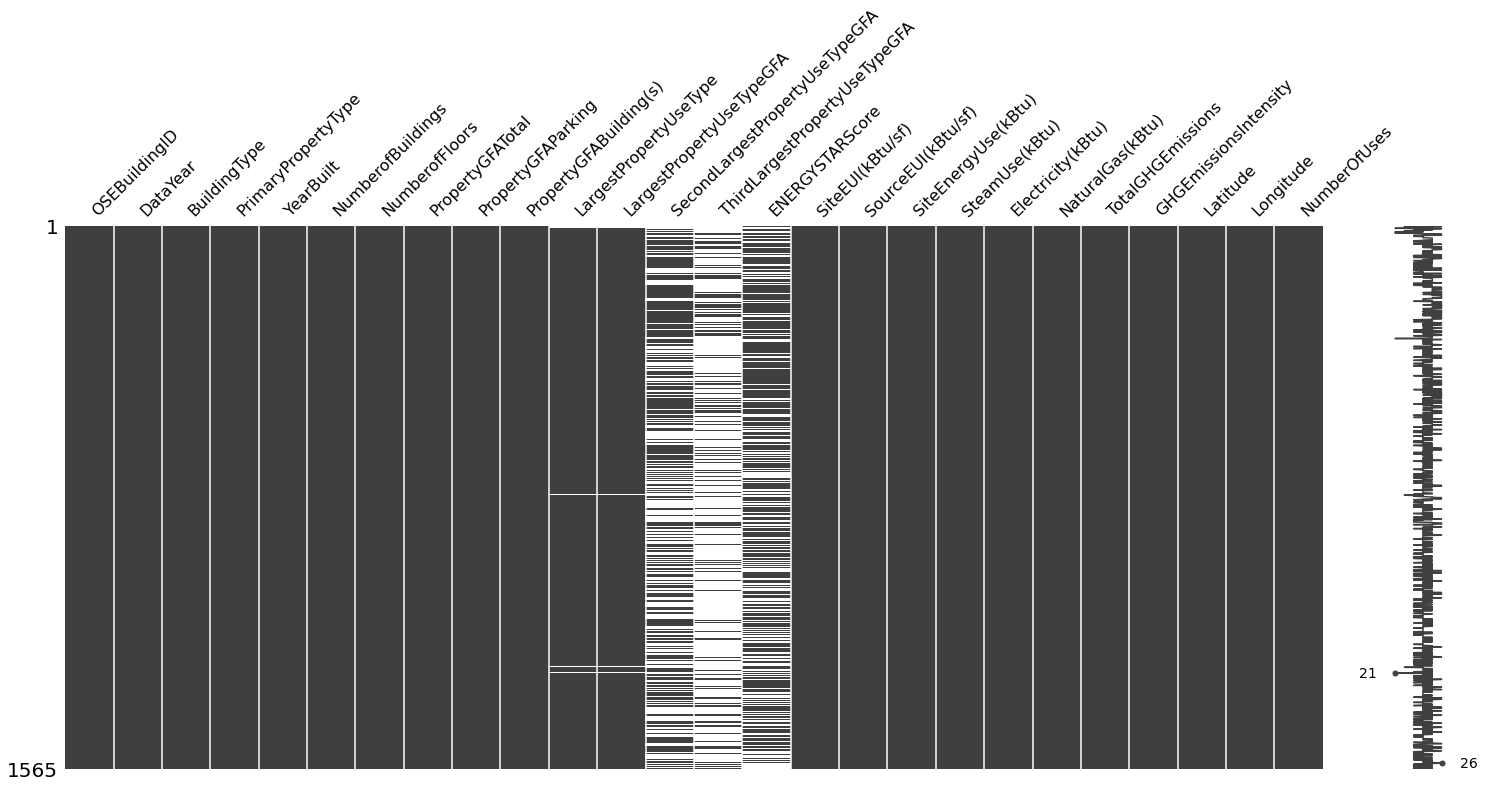

In [25]:
msno.matrix(df)

In [26]:
# sauvegarde du dataset nettoyé
df.to_csv("data_energy_clean.csv", index=False)